# API


# What are APIs ?
Application Programming Interfaces (API) can be described as a set of methods/functions/guidelines wirtten for the communication between two applications/computers/servers. Communication can includes data, instruction sets and other set of guideline for a user to use. In general Data Scientists mostly use Webservice APIs for Data imports from other application's data center. Therefore, we will focus on APIs which have to deal with transfering data from an another server/application/database.


Eg.
We can assume this application calculates distance and finds the nearest restaurant for you. For this application to work it needs data that gives the coordinates for the nearest restaurants which means it will require a database/server from where it can access this data free. 
There are several ways to go about this process, one is obviously to collect data from scratch and build your own database, in any case this would be very laborious but what if we can access a dataset that contains geospatial information about roads, distances and buildings and so we can calculate the nearest restaurants and in the application. So, we access the Google Maps API which helps in accessing all this data because it is just like quering information in Google map app but in this case we are automating and narrowing what we are searching for.

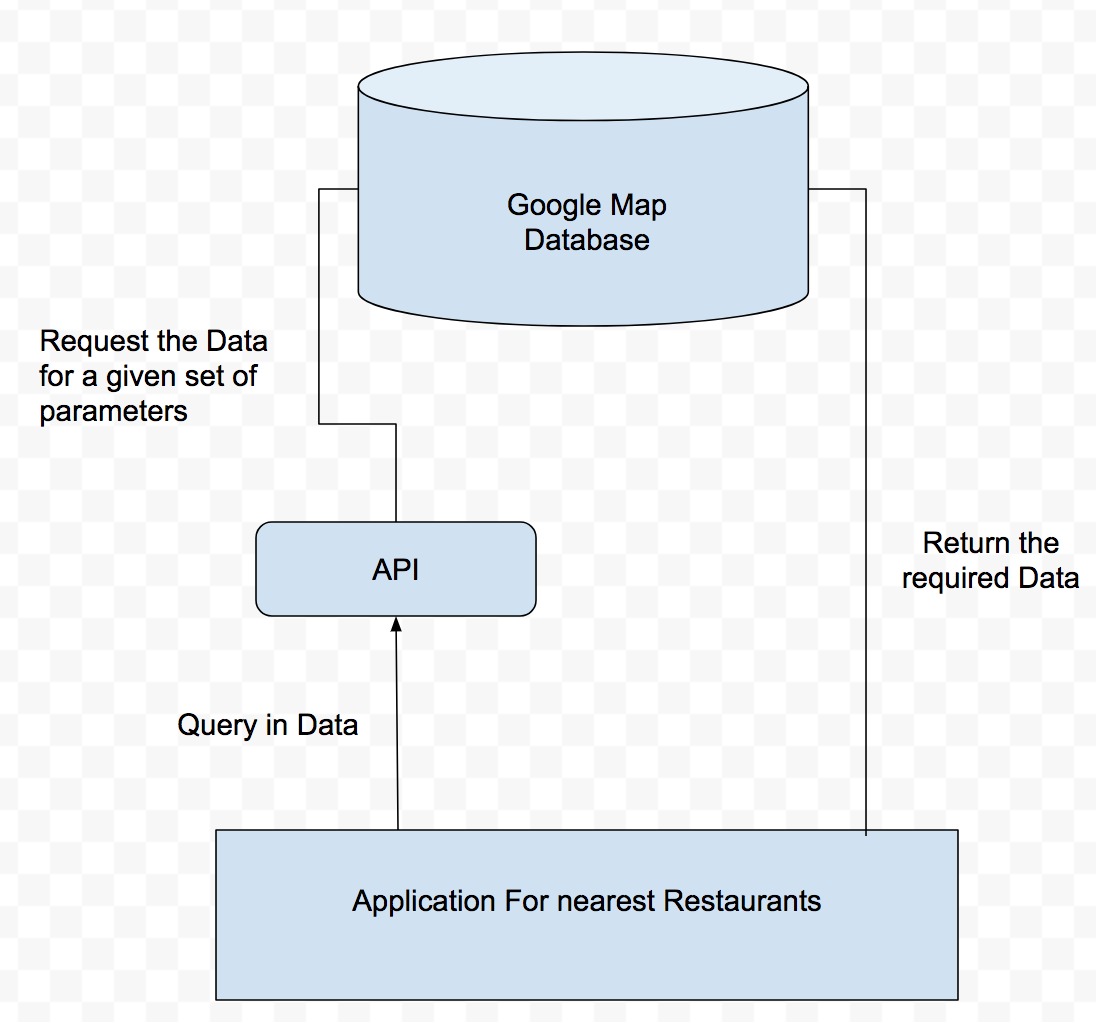

## Different Types of APIs

1. Predefined functions and methods for a Programming Language: This does include all the frameworks and libraries, for all types of manipulation and calculation of data
2. OS API: For the processes of an Operating system, there needs to be a certain types of guildelines for running the processes, eg. running parallel procedures or concurrent ones
3. Remote APIs: Certain application which help connecting to other applications eg. connecting via VM
4. Web APIs: Allows for connection of application over the web. We will be working these. The most widely used APIs are RESTful API<br>
RESTful API - Representation state transfer technology which is widely used and the term API in todays' teminology usually refers to a RESTful API which helps with accessing and updating data in big clusters of databases. In this section we aim at understanding the working of this type of API since it offers simplest way to access data for wide range of research and testing. It is a web API.
    
    

## How to use an API ?

In order to understand the functionality behind API, we must, as users, visualize that every time we make a call to the API we actually are requesting ( asking for the data we need ) a server/database for a set of information. 

For any user to successfully to a make a request to a certain API, they would need the API authentication key(s). An API may require a key or combination of keys depending from where you want to retrieve data. 
i.e. an API like twitter requires 4 keys where as some Google maps API only need 1

It is also important to understand that there are several ways to call an API of an application. One can always use a wrapper class for any programming language (for this section we will use Python) which eases the work for a Data Scientist, but at same time we will also explore a raw api call.

For this first example we will observe the working of a wrapper class written for Python. APIs, in this case, have authentication mechanism which is basically a function that checks if the client/user is a valid client to that application, eg. like a user in twitter would have the approprite authentication key(s)

Steps to take:<br>
Step 1: Get authentication key(s)

Step 2: From the API reference get the authentication mechanism 

Step 3: Authenticate

Step 4: Process with the Data retrieved

### We will follow a simple example to run you through a typical API

The example we are doing will let us run through the Twitter API with the help of a Python Library called Tweepy, i.e. a python wrapper class. Tweepy library lets us use the twitter API with the help of pre-defined wrapper methods. Every API would have a set of rules to help the user extract and send data.

##### Prerequisites for the example
1. Install tweepy
2. Create a twitter account
3. with the twitter account create a developer account 
4. And acquire the authentication keys

```Python
# Instatiating all the the authentication keys
consumer_key = 'ZBPapHvwYauZW7WEJjBwUVUSc'
consumer_secret = 'ndVDPuv4fwvG3UADicWdPv3mhyynqKdOPXfW3OvIoUHF0D9vp4'
access_token = '1024321136321089536-SqxwqQ52kGeEZEJQlmYaag7WN9gQym'
access_token_secret = 'f1qws5jnISkKA0PnzjH6A96QMdZeaPYc3Hz7cp1mDNHtw'
```

```Python
# Import Libraries and authenticate 
import tweepy as t 
from tweepy import OAuthHandler

# Authenticating twitter API with OAuthHandler<br> with keys we found on the developer account in twitter
auth = OAuthHandler(consumer_key, consumer_secret)

# setting the access keys 
auth.set_access_token(access_token, access_token_secret)

# An authenticated object to be used by the user for any type of <br>function 
api = t.API(auth)
```


```Python
# .home_timeline() allows the user to get all the tweets in a list
for tweets in api.home_timeline():
# Each tweet in this list are stored in a special type of object which contain a set of properties. One ofthose properties is text, which contains the tweet in string value. therefore we are going to access that feature
    print(tweets.text)
# Note: In the twitter api, the data recived in not usually all the data for instance which above function used .home_timeline() we can only see the most recent tweets which means that tweets that are more than 3 weeks old cannot be accessed.Therefore, before a wrapper please read its documentation for its limitations
```

```Python
# .get_user allows us get information for a different twitter account
different_user = api.get_user('pycon')
print('@pycon followers: ',different_user.followers_count)
different_user1 = api.get_user('gvanrossum')
print('@gvanrossum followers: ', different_user1.followers_count)
```

Twitter API Reference: http://docs.tweepy.org/en/v3.5.0/api.html

#### Cursor in tweepy
Cursor is a special method in the tweepy library. 
It lets us iterate through a list of tweets, followers or people who are being followed.
A great advantage for using Curson is that is reduces verbosity and hence returns a single list of object in 
one line. In technical terms curson allows for pagination that is send data from multiple sets of pages.

Note: Cursor works in iterative manner, i.e. one wouldn't not be able to get all the data from a particular account. eg. when accessing the .followers feature after a while the compiler will give you an error which about Rate limit. This means that you have exhausted the amount of data that can be retrieved in a span of 15 min. and you would have to wait for another 15 min to run this function. Therefore in the following example you can see a feature named 'count' which helps us access blocks count number of followers. But the max number of followers one can access is 200 therefore, every 15 min. one cannot go beyond the limit 200 * 15 followers because theoretically the program is coded to retrieve data every minute in the span of 15 min.  
The process in the example gives us an understanding of how Cursor() works

```Python
# Instantiate Keys 
consumer_key = 'ZBPapHvwYauZW7WEJjBwUVUSc'
consumer_secret = 'ndVDPuv4fwvG3UADicWdPv3mhyynqKdOPXfW3OvIoUHF0D9vp4'
access_token = '1024321136321089536-SqxwqQ52kGeEZEJQlmYaag7WN9gQym'
access_token_secret = 'f1qws5jnISkKA0PnzjH6A96QMdZeaPYc3Hz7cp1mDNHtw'
# Import tweepy
import tweepy as t
from tweepy import OAuthHandler
from tweepy import Cursor
# Authenticate the API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = t.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# Create pycon as an Object
different_user = api.get_user('ColaberrySODA')
# Print the friends
for i in Cursor(api.friends, id='ColaberrySODA', count=200).items(different_user.friends_count):
    print(i.name)
```


#### Exercise 
Find the similarity between 2 twitter accounts 'ColaberryInc' and 'ColaberrySales' based on who they are following. In this case we define similarity based on who the twitter accounts are following. Which can be accessed through the <b>.friends()</b> method which also be found in the API reference. Make sure to use the <b>Cursor</b> method to iterate through the friends' list and also keep the count = 200

condition 1: if they have atleast 5 common friends then print 'somewhat similar'

condition 2: if they have more than 5 but lesst than 10 common friends then print 'similar'

condition 3: if they have more than 10 but less than 20 print 'potential friends'

condition 4: if they have more than 20 print 'recommended friends'

In [2]:
# Answer

# Instantiate your keys
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

# Import Libraries
import tweepy
from tweepy import OAuthHandler
from tweepy import Cursor

# Solution
```Python
# First we instantiate the authentication keys
consumer_key = 'ZBPapHvwYauZW7WEJjBwUVUSc'
consumer_secret = 'ndVDPuv4fwvG3UADicWdPv3mhyynqKdOPXfW3OvIoUHF0D9vp4'
access_token = '1024321136321089536-SqxwqQ52kGeEZEJQlmYaag7WN9gQym'
access_token_secret = 'f1qws5jnISkKA0PnzjH6A96QMdZeaPYc3Hz7cp1mDNHtw'

# Second we import Libraries
import tweepy
from tweepy import OAuthHandler
from tweepy import Cursor

# Third we instantiate an api object with the help of an authentication mechanism
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Fourth we get the users with the help of .get_user()
ColaberryInc = api.get_user('ColaberryInc')
ColaberrySales = api.get_user('ColaberrySales')

# Fifth we acquire their firends which is who they are following
ColaberryInc_str = 'ColaberryInc'
ColaberryInc_friends = []
ColaberrySales_str = 'ColaberrySales'
ColaberrySales_friends = []

# Here we are appending all the names to the ColaberryInc_friends and ColaberrySales_friends lists
# by retrieving from the ColaberryInc and ColaberrySales api objects
for i in Cursor(api.friends, id=ColaberryInc_str, count=200).items(ColaberryInc.friends_count):
    ColaberryInc_friends.append(i.name)
for e in Cursor(api.friends, id=ColaberrySales_str, count=200).items(ColaberrySales.friends_count):
    ColaberrySales_friends.append(e.name)

# Last we compare the which ones are the common people they are following
Common_ppl = []
for i in ColaberryInc_friends:
    for e in ColaberrySales_friends:
        if i == e:
            Common_ppl.append(i)
            
# Here we compare if they both are similar with a bunch of if else statements
if len(Common_ppl) < 5:
    print('Not Similar')
elif len(Common_ppl) >= 5 and len(Common_ppl) < 10:
    print('Somewhat Similar')
elif len(Common_ppl) >= 10 and len(Common_ppl) < 20:
    print('Potential Friends')
else:
    print('Recommended Friends')
```

### Raw API Call Example
In the previous example we observed an api transaction with the help of a wrapper class written in python. Here we will discuss interaction with the api directly without the help of any wrapper class to support. Hence, we will use a python module 'requests' which helps developers make HTTP calls.

For more on Http calls https://docs.python.org/3/library/http.html

For more on requests http://docs.python-requests.org/en/master/


### openweathermap
openweathermap is an open source application which gives access to weather forcast of the world. In this example we call an api request directly with any help of a wrapper class. We will call through 'requests' which is a python library allows user http calls and so there if not wrapper class, hence we will make calls directly. This is a more widely used practice to call an api since its more generic.  

In order to make the call we need an api key which can be retrieved by making an account <br>(https://home.openweathermap.org/users/sign_up). 

For openweathermap helps in representing temperature in different units. <br>
for different units https://openweathermap.org/current

.json() is there to convert the resultant text in the form of json<br> 
With the help of .json() method we are able to access the bits of information very easily<br>
for more info. https://docs.python.org/3/library/json.html

```Python
# Import Library
import requests as re

# Instantiate the app id
appid = '2ccdd152f1329726e81ae3cefaa0386e'

# We will retrieve information for 3 Cities
city1 = 'London,UK'
city2 = 'Delhi,IN'
city3 = 'New York,US'

# This url represents the api call with places for parameters to be filled
# q = city, country
# appid = api key
# units = measure of temperature
empty_url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units={}'

# the temperature for the cities we will be in metric system
units = 'metric'

# a complete api url for London in UK
url1 = empty_url.format(city1, appid, units)

# a complete api url for Delhi in India
url2 = empty_url.format(city2, appid, units)

# a complete api url for New York in USA
url3 = empty_url.format(city3, appid, units)

# we call the .get() method from the requests class and then converting into json format
city_info1 = re.get(url1).json()
city_info2 = re.get(url2).json()
city_info3 = re.get(url3).json()

# Latitude and Longitude of all the cities
print('Longitude and Latitude Coordinates of London, UK:', city_info1.get('coord'))
print('Longitude and Latitude Coordinates of Delhi, IN:', city_info2.get('coord'))
print('Longitude and Latitude Coordinates of New York, US:', city_info3.get('coord'))
```

#### Exercise
Pick a city and display its temperature

In [21]:
# Write your solution here

# Import Library
import requests
# Instantiate you appid
appid = ''
# Pick a city (and to be precise we can also choose the country. we can represent with its 2 letter representation)
# Example: city = 'Hyderabad, IN'
city = ''

# we will use the metric system
units = 'metric'

# Empty_url to fill in the parameters
empty_url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units={}'

# Solution
```Python
# Importing the libraries
import requests

# Instantiate the api key
appid = '2ccdd152f1329726e81ae3cefaa0386e'

# for the solution we will use 'Hyderabad, IN'
city = 'Hyderabad,IN'

# for metric system
units = 'metric'

# empty_url 
empty_url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units={}'

# creating the api url
url = empty_url.format(city, appid, units)

# Requesting Data
api_call = requests.get(url)

# Checking if the call was successful - it should be 200
assert(api_call.status_code == 200)

# converting data to json format
data_json = api_call.json()

# printing the answer
print('Temperature in ',city, ' is', data_json.get('main').get('temp'), 'Celsius')
```